<div style="border:solid green 2px; padding: 20px">

<b>Привет, Сергей!</b>

Меня зовут Алина Соловьева и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общение на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>    

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

<div class="alert alert-info"> <b>Комментарий студента:</b> Привет, Алина.</div> 

# Описание проекта


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Хорошо, что есть введение - это важная часть проекта.</div>

##  Просмотр данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️В будущем для подгрузки данных рекомендую использовать конструкцию try-except или os.path, так удобнее работать с файлом локально.</div>

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Не забывай использовать df.head() для просмотра датасета.</div>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**
Прочитали файл.  Видим, что надо привезти названия столбцов к стандарту. Так же видно, что присутствуют много пропусков. Нужно изменить тип данных некоторых столбцов.



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Отличный первичный взгляд на данные.</div>

## Подготовка данных

### Изменение названия колонок

In [5]:
# Изменение названия столбцов
data = data.rename(columns={'Name': 'name', 'Platform':'platform', 'Year_of_Release':'year_of_release','Genre':'genre',
                            'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales','Other_sales':'other_sales',
                            'Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'})


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Чтобы вручную не прописывать названия столбцов, можно использовать 

    df.columns.str.lower() 
</div>

In [6]:
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


### Работа над пропусками и дубликатами

In [7]:
# поиск пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски возможно появились из -за технических ошибок или человеческого фактора.

In [8]:
# Посмотрим пропуски в стобце 
data.loc[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в стобцах с именем и жанром находятся на одних строчках, Удалим их.

In [9]:
data = data.dropna(subset=['genre'])
print(data['name'].isna().sum())
data['genre'].isna().sum()

0


0


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Да, эти пропуски можно удалить.</div>

In [10]:
# уникальные значения пользовательских оценок
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` присутствует значение `tbd`. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято

Это значит, что пользовательские оценки не успели обработать и(или) добавить в таблицу. Заменим их на NaN.

In [11]:
data.loc[data['user_score']=='tbd','user_score'] = np.NaN


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Верное решение :)</div>

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Пропуски в столбцах  `critic_score, user_score,`  невозможно чем либо заменить. Т.к.  оценки являются индивидуальными для каждой игры.

Теперь рассмотрим пропуски в столбце с годом релиза и возрастным рейтингом. Т.к. у нас в таблице приставлено несколько игровых платформ, возможно на другой платформе будет присутствовать год выпуска и рейтинг.


In [13]:
# посмотрим на талбцу с пропусками 
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Возьмем одну из этих игр для проверки нашей теории.

In [14]:
#  проверим наличие нужных данных в других строках
data.loc[data['name']=='PDC World Championship Darts 2008']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.0,0.00,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,NaN,E10+


Действительно если у игры пропуск в дате релиза на одной платформе, то на какой либо другой год релиза может присутствовать.
Тоже касается и рейтинга.
Попробуем заменить так пропуски в этом столбце взяв максимальный год релиза игры.


In [15]:
for i in data[data['year_of_release'].isna()==True].index:
    data.loc[i,'year_of_release'] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()
    

In [16]:
for i in data[data['rating'].isna()==True].index:
    try:
        c=data.loc[data['name'] == data['name'][i], 'rating']
        c=c.dropna().reset_index(drop=True)
        data.loc[i,'rating'] =c[0] 
    except:
        continue

In [17]:
# проверим
data.loc[data['name']=='PDC World Championship Darts 2008']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,2008.0,Sports,0.01,0.00,0.0,0.00,NaN,NaN,E10+
16373,PDC World Championship Darts 2008,PSP,2008.0,Sports,0.01,0.00,0.0,0.00,43.0,NaN,E10+


In [18]:
# Узнаем от скольких пропусков мы избавились 269- столько пропусков было в столбце в начале работы
269 - data['year_of_release'].isna().sum()

123

In [19]:
# Узнаем от скольких пропусков мы избавились 6766- столько пропусков было в столбце в начале работы
6766 - data['rating'].isna().sum()

439

Своими действиями мы сократили количество пропусков в столбце  `"rating"` с 6766 до 6327. 
В столбце  `"year_of_release"` с 269 до 146

Оставшиеся пропуски оставим без изменений.



<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Ты придумал хороший способ избавиться от пропусков, но во-первых, в случае с годом релиза их можно удалить (они занимают небольшой объем данных), во-вторых, восстанавливать данные искусственным путем не совсем корректно в данном случае, это может повлиять на результаты исследования.</div>

In [20]:
# Поиск дубликатов
data.duplicated(['name', 'platform', 'year_of_release']).sum()

2

In [21]:
# удалим дубликаты
data = data.drop_duplicates(['name', 'platform', 'year_of_release']).reset_index(drop=True)

In [22]:
# Проверяем
data.duplicated(['name', 'platform', 'year_of_release']).sum()

0


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>Важно посмотреть еще и неполные дубликаты. Возможно, задублировались строки по названию игры, платформе и году релиза.</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Действительно. Нашел и удалил. Вывод изменил.</div> 


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Отлично!</div>

### Изменение типа данных

In [23]:
# изменим тип данных в столбцах годом релиза, оценками критиков и пользователей
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = data['user_score'].astype('float64')

### Создание столбца c общими продажами

In [24]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['other_sales'] + data['jp_sales']

In [25]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод:**
В этом разделе мы привели название столбцов к стандарту.
Провели работу над пропусками. Там, где это было возможно провели замену пропусков на подходящее значение. Пропуски в колонке с именами были удалены.
Дубликаты удалены.
Был создан столбец с общим количеством продаж игр.



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Новый столбец добавлен корректно.</div>

##  Исследовательский анализ данных

In [26]:
# функция для графика
def barplot(data, x, y, xlabel, ylabel, rotation, title):
    plt.figure(figsize=(15,3))
    sns.barplot(palette=sns.color_palette("crest"),data=data, x=x, y=y);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = rotation)
    plt.title(title)
    plt.show()

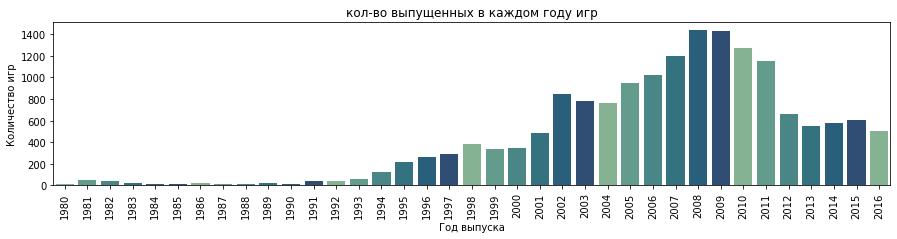

In [27]:
#  график по количеству выпущенных за все  время игр
year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
barplot(year, x=year.index, y='name',xlabel='Год выпуска',ylabel ='Количество игр', rotation=90, title='кол-во выпущенных в каждом году игр')

Как мы видим основной рост выпуска игр начался с 1994.
Больше всего игр было выпущено с 2006 по 2011. С 2012 года производства игр резко снизилось.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Да, похоже на то.</div>

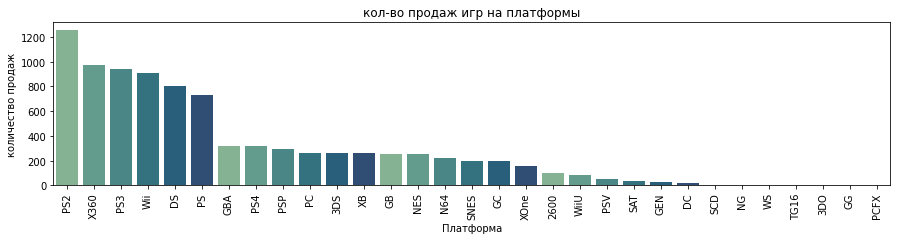

In [28]:
# график популярных платформ
platform =  data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', 
                                                                                                ascending=False)
barplot(platform, x=platform.index, y='total_sales',xlabel='Платформа',ylabel ='количество продаж', rotation=90,title='кол-во продаж игр на платформы')


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>Не забывай подписывать заголовок графика. Это касается всего проекта.</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил  ко всем графикам.</div> 


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Супер!</div>

Больше всего продаж было на платформах ps2 и x360. Выберем 15 платформ с самыми большими продажами и сделаем распределение по годам для того что бы выяснить жизненный цикл платформ.

In [29]:
# определим 15 самых популярных платформ
list_plat = platform.head(15).index.unique()
list_plat

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC',
       '3DS', 'XB', 'GB', 'NES', 'N64'],
      dtype='object', name='platform')

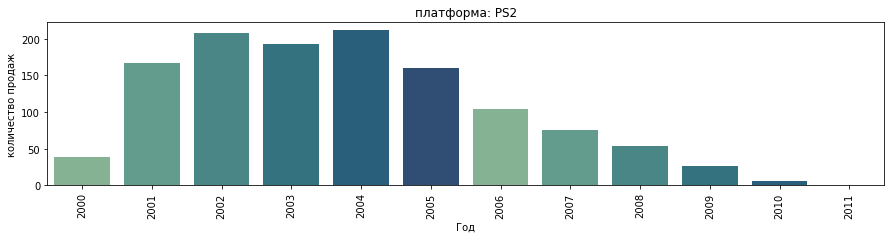

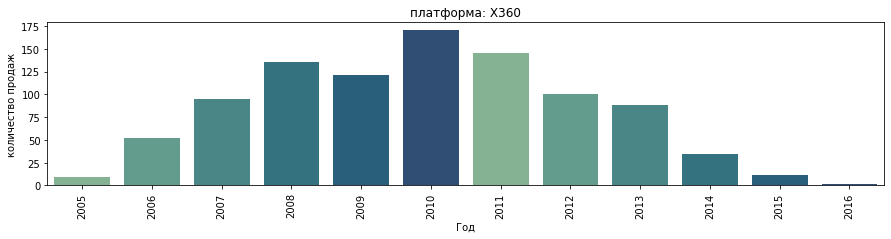

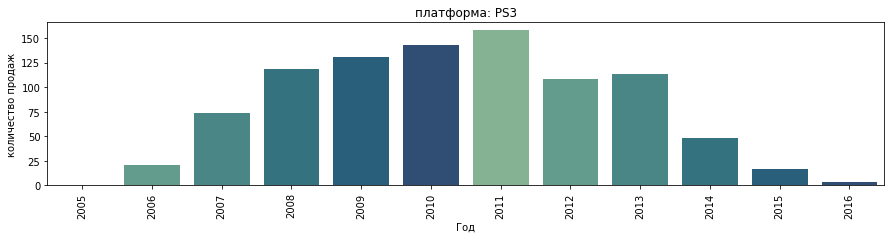

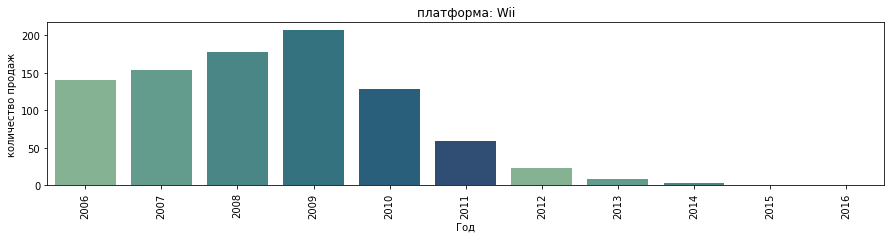

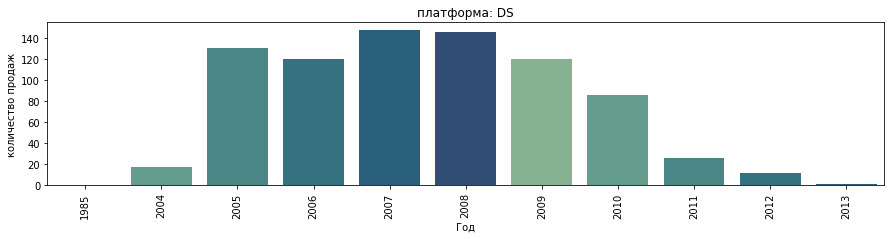

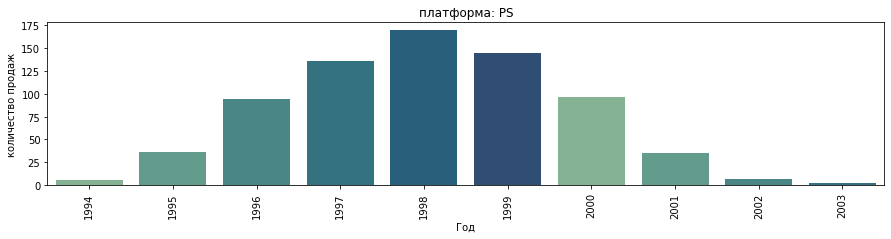

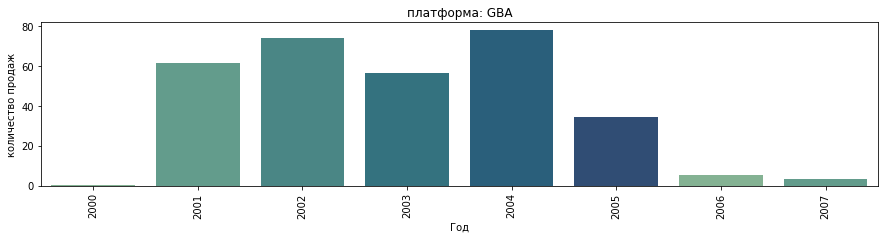

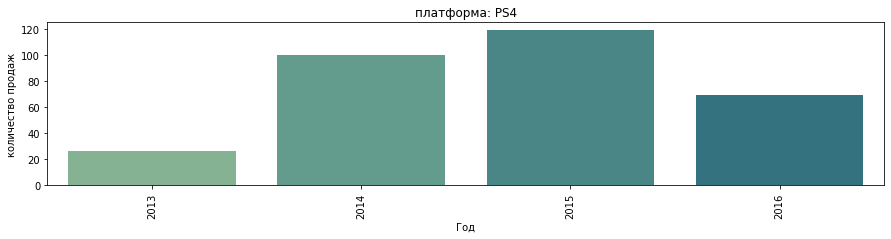

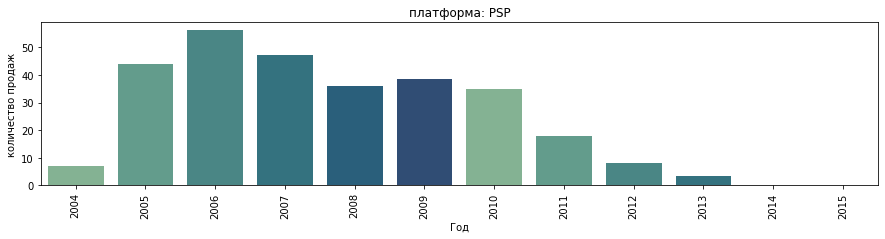

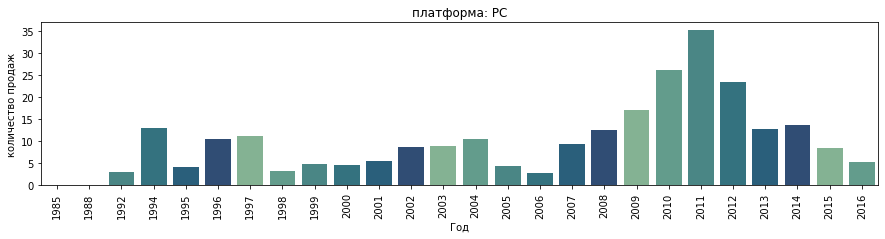

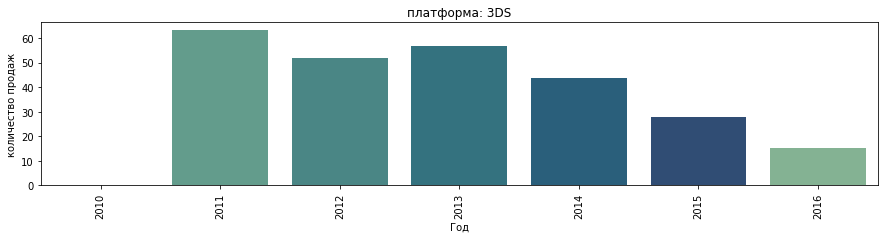

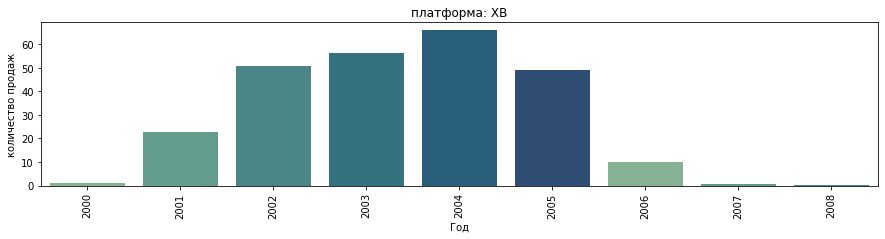

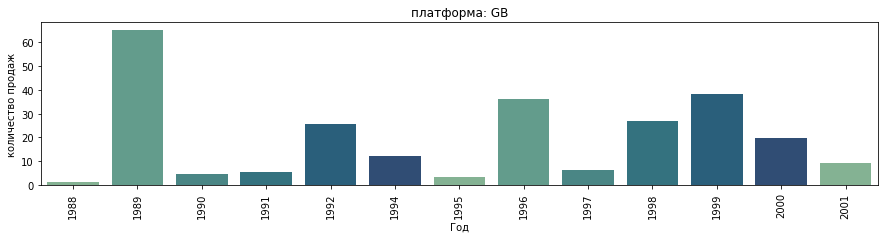

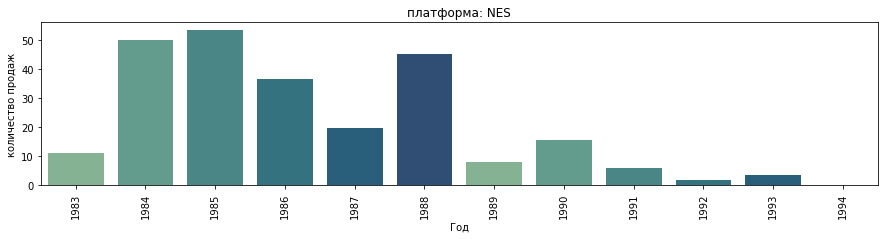

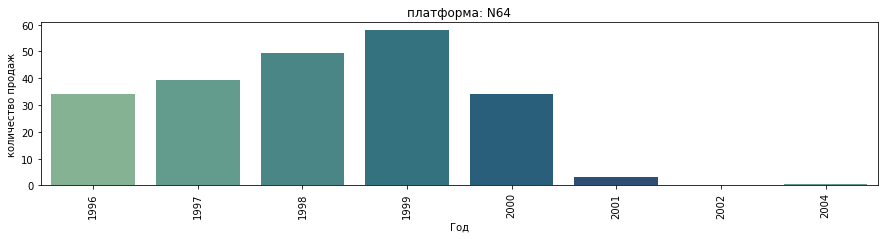

In [30]:
#  цикл для показа количества выпущенных игр на платформе.
for i in list_plat:
    df=data[data['platform']==i].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    barplot(df,x=df.index, y='total_sales',xlabel='Год',ylabel ='количество продаж', rotation=90,
            title=f'платформа: {i}')

По этим графикам можно сделать вывод, что жизненный цикл игровых платформ 8- 10 лет( исключение составляет РС).

Из всех выше перечисленных данных следует что для прогноза на 2017 надо взять данные начиная с 2012 года.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Хорошее решение! В целях прогнозирования редко берут большой промежуток времени, обычно это 2-3 года. Если учесть тот факт, что данные за 2016 год у нас неполные, формировать актуальный период с 2012 года включительно - более, чем оптимально.</div>

In [31]:
# Создание актуального датафрейма
topical_data = data[data['year_of_release']>=2012]
topical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2898 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2898 non-null   object 
 1   platform         2898 non-null   object 
 2   year_of_release  2898 non-null   Int64  
 3   genre            2898 non-null   object 
 4   na_sales         2898 non-null   float64
 5   eu_sales         2898 non-null   float64
 6   jp_sales         2898 non-null   float64
 7   other_sales      2898 non-null   float64
 8   critic_score     1321 non-null   float64
 9   user_score       1539 non-null   float64
 10  rating           1774 non-null   object 
 11  total_sales      2898 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 297.2+ KB


In [32]:
topical_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ.

In [33]:
top_platf = topical_data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')

In [34]:
top_platf

total_sales
platform year_of_release             
3DS      2012                   51.76
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2012                   11.67
         2013                    1.54
PC       2012                   23.45
         2013                   12.66
         2014                   13.63
         2015                    8.52
         2016                    5.25
PS3      2012                  108.27
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2012                    7.95
         2013                    3.38
         2014                    0.24
         2015                    0.12
PSV      2012                   16.19
         2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2012                   22.94
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2012                   17.56
         2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2012                  100.72
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

Как мы можем видеть все на всех платформах кроме PS4 и XOne продажи игр резко падают после 2014 года.
Из этого списка мы можем определить потенциально выгодные платформы: PS4, XOne, PC,3DS,PSV,WiiU.

In [35]:
# актуальный датафрейм с потенциально выгодными платформами
final_data = data.loc[data['platform'].isin(['PS4', 'XOne', 'PC','3DS','PSV','WiiU'])].reset_index(drop=True)
final_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
2,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
3,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
4,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
2705,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2706,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01
2707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2708,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

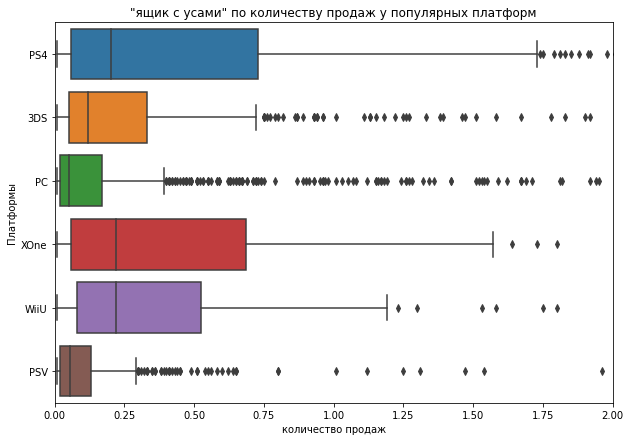

In [36]:
# построим "ящик с усами" по продажам на популярных платформах
plt.figure(figsize=(10,7))
sns.boxplot(data=final_data, x='total_sales', y='platform');
plt.xlabel("количество продаж")
plt.ylabel("Платформы")
plt.xlim(0,2)
plt.title('"ящик с усами" по количеству продаж у популярных платформ')
plt.show()


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>Этот боксплот не совсем читабельный :( Не видна медиана и квантили. Попробуй ограничить боксплот по оси с помощью параметра xlim.</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделал</div>    


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Да, так гораздо лучше.</div>

По количеству продаж лидируют PS4, Xone, WiiU. Меньше всего продаж у PSV и РС.

Узнаем как влияют на продажи игр платформы PS4 Оценки критиков и пользователей.

In [37]:
# функция графика
def scatter(data,x,y, xlabel, ylabel, title):
    #plt.figure(figsize=(7,7))
    sns.scatterplot(palette=sns.color_palette("crest"),data=data, x=x,y=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [38]:
# Возьмем самую популярную платформу
ps4 = final_data.loc[final_data['platform']=='PS4']
print('Корреляция между оценкой критиков и продажами:', ps4['critic_score'].corr(ps4['total_sales']))
print('Корреляция между оценкой пользователей и продажами:', ps4['user_score'].corr(ps4['total_sales']))

Корреляция между оценкой критиков и продажами: 0.40656790206178095
Корреляция между оценкой пользователей и продажами: -0.031957110204556376


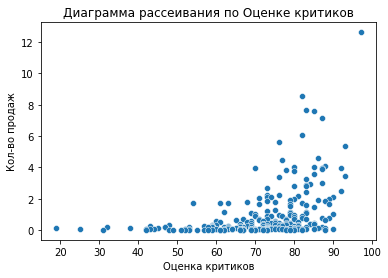

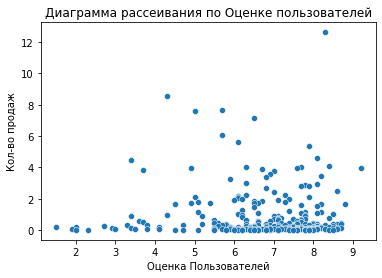

In [39]:
# Рапределение продаж от оценок

scatter(ps4, x='critic_score',y='total_sales',xlabel='Оценка критиков', ylabel='Кол-во продаж',
        title='Диаграмма рассеивания по Оценке критиков')
scatter(ps4, x='user_score',y='total_sales',xlabel='Оценка Пользователей', ylabel='Кол-во продаж',
        title='Диаграмма рассеивания по Оценке пользователей')

По графикам и значениям корреляции можно сделать вывод, что покупатели выбирают игры больше на основе оценок критиков.
Пользовательские оценки на продажи не плияют и корреляция с значением -0.031 это потверждает.

Соотнесем эти выводы с другими платформами.

Название платформы: XOne


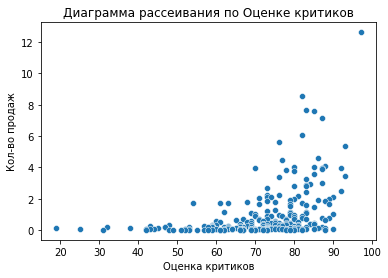

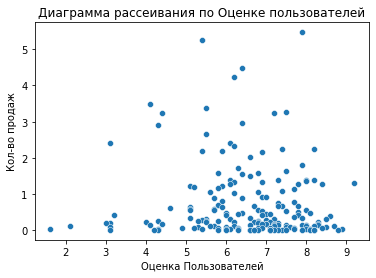

Корреляция между оценкой критиков и продажами: 0.4169983280084017
Корреляция между оценкой пользователей и продажами: -0.0689250532827941
-------------------------------------------------------------
Название платформы: PC


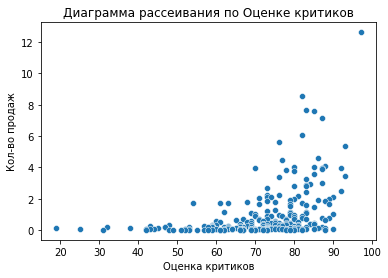

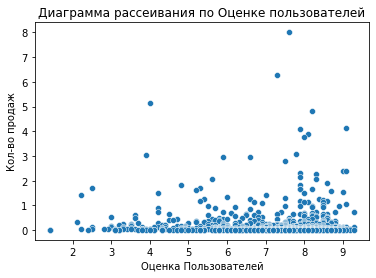

Корреляция между оценкой критиков и продажами: 0.25688673789482114
Корреляция между оценкой пользователей и продажами: 0.01047568462148642
-------------------------------------------------------------
Название платформы: 3DS


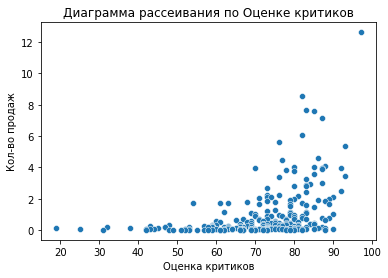

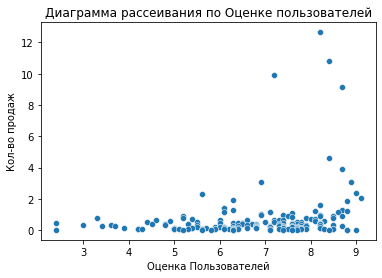

Корреляция между оценкой критиков и продажами: 0.3494009303924131
Корреляция между оценкой пользователей и продажами: 0.22480798039571073
-------------------------------------------------------------
Название платформы: PSV


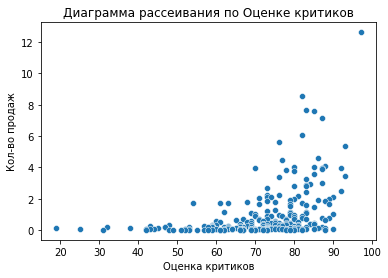

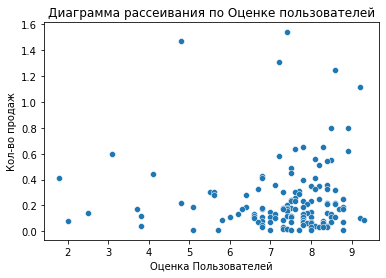

Корреляция между оценкой критиков и продажами: 0.13151672154292637
Корреляция между оценкой пользователей и продажами: 0.013579522883028902
-------------------------------------------------------------
Название платформы: WiiU


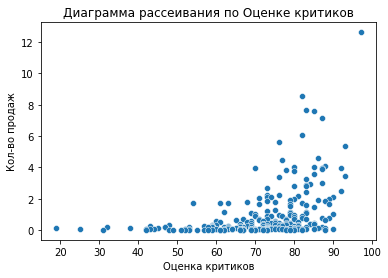

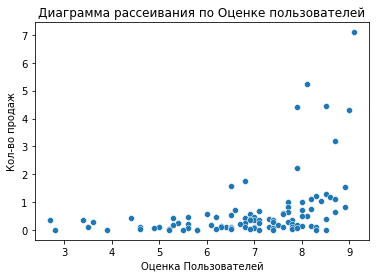

Корреляция между оценкой критиков и продажами: 0.34837976012017485
Корреляция между оценкой пользователей и продажами: 0.4002190202148617
-------------------------------------------------------------


In [40]:
# Цикл для построения рапределений продаж от оценок, и показ корреляции.
list_plat =['XOne', 'PC','3DS','PSV','WiiU']
for i in list_plat:
    df=final_data.loc[final_data['platform']==i]
    print('Название платформы:',i)
    scatter(ps4, x='critic_score',y='total_sales',xlabel='Оценка критиков', ylabel='Кол-во продаж',
            title='Диаграмма рассеивания по Оценке критиков')
    scatter(df, x='user_score',y='total_sales',xlabel='Оценка Пользователей', ylabel='Кол-во продаж', 
            title='Диаграмма рассеивания по Оценке пользователей')
    print('Корреляция между оценкой критиков и продажами:', df['critic_score'].corr(df['total_sales']))
    print('Корреляция между оценкой пользователей и продажами:', df['user_score'].corr(df['total_sales']))
    print("-------------------------------------------------------------")

Вывод: Все платформы имеют высокую связь между оценкой критиков и количеством продаж. Оценки пользователей либо не имеют влияния на продажи, либо их влияние невелико. Исключение платформа WiiU  где оценки пользователей влияют на продажи сильнее, чем оценки критиков.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️С этим трудно поспорить. Молодец, что рассмотрел несколько платформ - по одной сложно делать однозначные выводы.</div>

Посмотрим на общее распределение по жанрам.

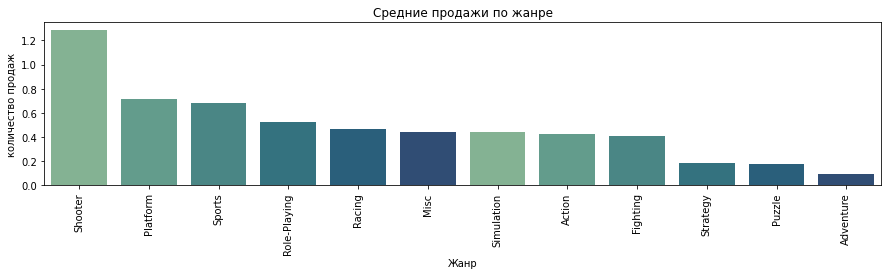

In [41]:
genre = topical_data.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', 
                                                                                                ascending=False)
barplot(genre, x=genre.index, y='total_sales',xlabel='Жанр',ylabel ='количество продаж', rotation=90, title='Средние продажи по жанре')

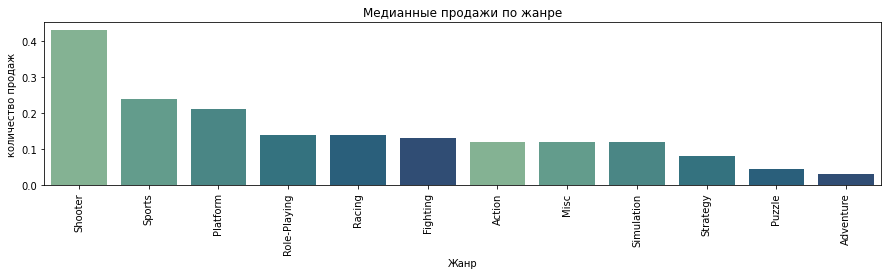

In [42]:
genre_med = topical_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', 
                                                                                                ascending=False)
barplot(genre_med, x=genre_med.index, y='total_sales',xlabel='Жанр',ylabel ='количество продаж', rotation=90, title='Медианные продажи по жанре')

Самые популярные жанры Shooter, Sports и platform. Самые не популярные жанры это Puzzle и Adventure.



<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>Общие продажи - не лучшая метрика для поиска наиболее прибыльного жанра. Высокие показатели могут быть обусловлены одной "стрельнувшей" игрой, но это не дает возможности судить о целом жанре. Здесь лучше рассмотреть медианные/средние продажи, и заодно понаблюдать, как поменяются результаты ;)</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Действительно, лидеры жанра изменились. Вывод изменен   </div> 


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Ожидаемо на самом деле ;) Спасибо за корректировку.</div>

**Вывод:**
Был проведен исследовательский анализ данных, и мы выяснили:
- Больше всего игр было выпущено с 2006 по 2011. С 2012 года производства игр резко снизилось.
- За все время самые популярные платформы это ps2 и x360.
- Жизненный цикл игровых платформ 8- 10 лет (исключение составляет РС)
- Определили потенциально выгодные платформы для 2017года: PS4, XOne, PC,3DS, PSV,WiiU.
- Что платформы имеют высокую связь между оценкой критиков и количеством продаж. Пользовательские оценки слабо влияют на продажи.
- Самые популярные жанры Shooter,Sports и platform. . Самые не популярные жанры это Puzzle и Adventure.


## Портрет пользователя каждого региона

In [43]:
# Создадим функццию для создания портрета пользователя каждого региона.
def region(data, column):
    name_column =['platform','genre','rating' ]
    dist = {'platform':'Платформа','genre':'Жанр','rating':'Рейтинг' }
    try:
        for i in name_column:
            df = data.pivot_table(index=i, values=column, aggfunc='sum').sort_values(by=column, ascending=False)
            df['percent'] = df[column] / df[column].sum() * 100
        
            print(f'Популяр. {dist[i]} \n', df.head())
            barplot(df,x=df.index, y=column,xlabel=dist[i],ylabel ='количество продаж', rotation=0, title=f'Популяр. {dist[i]} ')
            
            
    except:
        pass

### Регион Северной америки

Популяр. Платформа 
           na_sales    percent
platform                     
PS4         108.74  25.255481
PC           94.53  21.955128
XOne         93.12  21.627648
3DS          83.49  19.391026
WiiU         38.10   8.848941


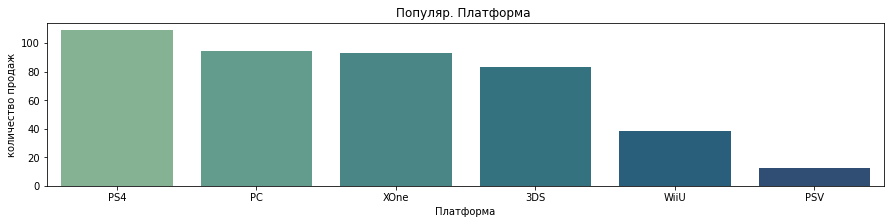

Популяр. Жанр 
               na_sales    percent
genre                            
Action           97.57  22.661185
Shooter          92.81  21.555648
Role-Playing     59.90  13.912114
Sports           40.06   9.304162
Simulation       28.34   6.582126


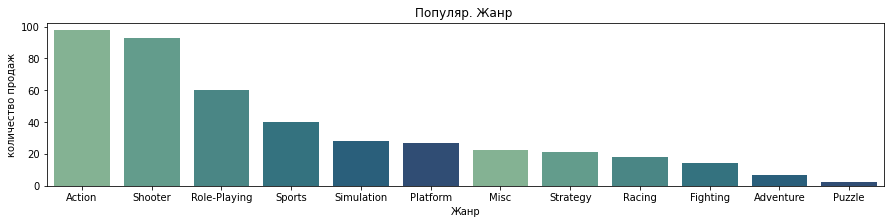

Популяр. Рейтинг 
         na_sales    percent
rating                     
M         132.11  37.464198
E          93.31  26.461163
T          77.09  21.861441
E10+       47.73  13.535434
K-A         2.30   0.652242


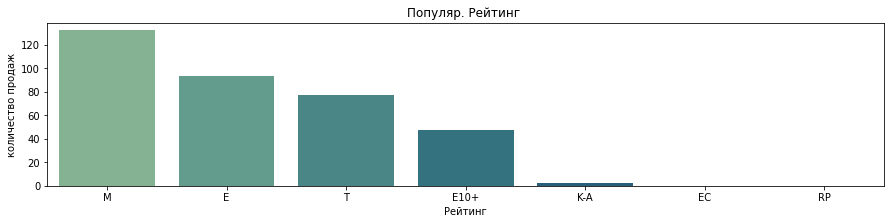

In [44]:
region(final_data, 'na_sales')


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>На графике по жанрам по оси абсцисс смешиваются подписи.</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Увеличил размер графиков.  </div> 

Можно сделать вывод что в северной Америке самая популярная платформа PS4 - доля продаж 25%. Второе место по полярности делят PC и XOne с 21%.
Самые популярные жанры это Action - 22% и Shooter 21%.
Самые большие доли продаж игр приходятся на рейтинг «M» («Mature») — «Для взрослых , «E» («Everyone») — «Для всех» и «T» («Teen») — «Подросткам

### Регион Европы

Популяр. Платформа 
           eu_sales    percent
platform                     
PC          142.44  32.756123
PS4         141.09  32.445671
3DS          61.48  14.138209
XOne         51.59  11.863861
WiiU         25.13   5.779004


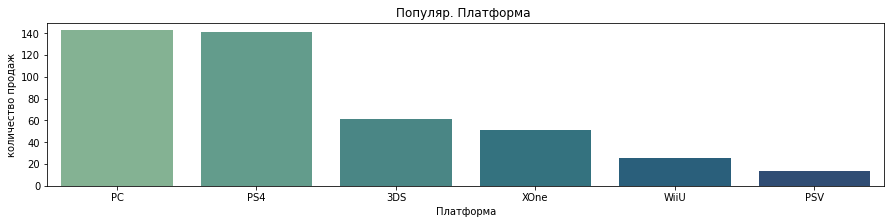

Популяр. Жанр 
               eu_sales    percent
genre                            
Action           97.55  22.433023
Shooter          83.39  19.176728
Role-Playing     58.04  13.347131
Sports           49.39  11.357940
Simulation       37.56   8.637461


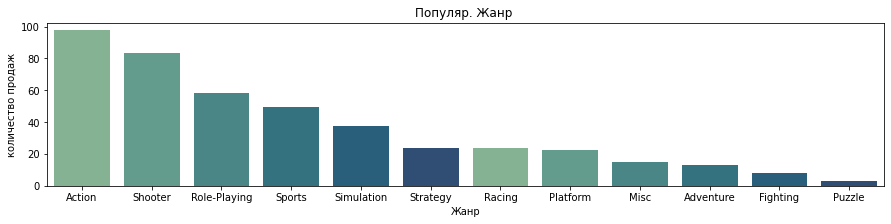

Популяр. Рейтинг 
         eu_sales    percent
rating                     
M         141.46  39.310824
E          95.23  26.463804
T          83.93  23.323607
E10+       39.04  10.848965
K-A         0.11   0.030568


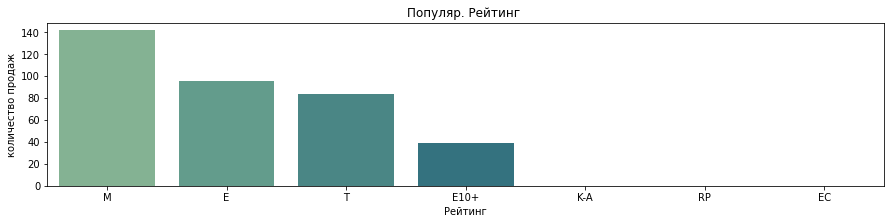

In [45]:
region(final_data, 'eu_sales')

Для Европы самые популярные платформы это PC и PS4 доля продаж по 32% у каждой. Второе место по популярности 3DS -14%.
Самые популярные жанры это Action - 22% и Shooter 19%.
Самые большие доли продаж игр приходятся на рейтиг «M» («Mature») — «Для взрослых, «E» («Everyone») — «Для всех» и «T» («Teen») — «Подросткам

### Японский регион

Популяр. Платформа 
           jp_sales    percent
platform                     
3DS         100.67  66.204130
PSV          21.91  14.408786
PS4          15.96  10.495857
WiiU         13.01   8.555833
XOne          0.34   0.223596


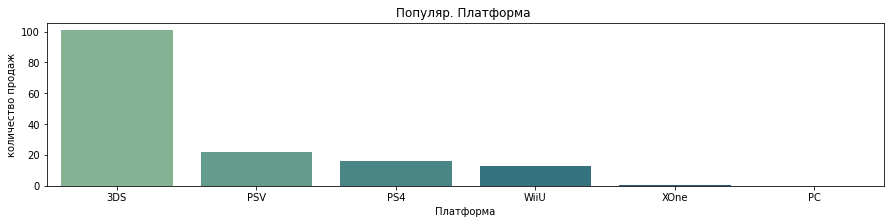

Популяр. Жанр 
               jp_sales    percent
genre                            
Role-Playing     54.29  35.703012
Action           36.54  24.029988
Platform         10.71   7.043272
Misc             10.70   7.036696
Simulation       10.64   6.997238


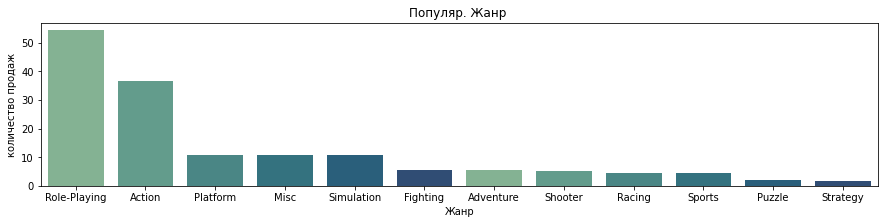

Популяр. Рейтинг 
         jp_sales    percent
rating                     
E          30.43  43.708704
T          20.53  29.488653
M          10.14  14.564780
E10+        8.52  12.237863
EC          0.00   0.000000


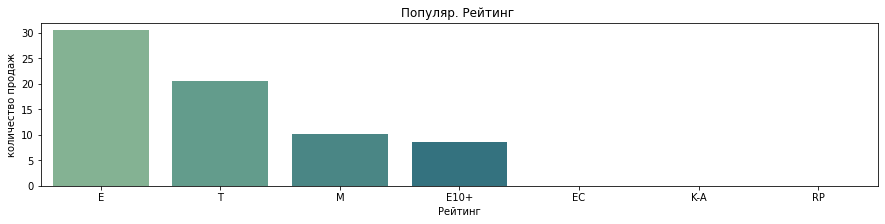

In [46]:
region(final_data, 'jp_sales')

В Японии огромную долю рынка занимают игры на портативные платформы. Самая популярная - 3DS занимает 2/3 рынка - 66%, PSV - 14%. Стационарные платформы занимают - менее 20%.
Популярные жанры это Role-Playing -35.7%, Action -24%.
Самые большие доли продаж игр приходятся на рейтинг «E» («Everyone») — «Для всех»  «M» («Mature») — «Для взрослых , «T» («Teen») — «Подросткам, «M» («Mature») — «Для взрослых .


**Вывод:**
Мы определили, что В Северной Америке любят играть на PS4, PC, Xone в игры жанра Action и Shooter. Самый популярный рейтинг у игр: «M» («Mature») — «Для взрослых.

В Европе популярны игры жанра Action и Shooter на платформы PS4, PC, 3DS. Самый популярный рейтинг так же «M» («Mature») — «Для взрослых.

В Японии самая популярная платформа 3DS. Самые популярные жанры Role-Playing, Action рейтинга «E» («Everyone») — «Для всех»


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️В целом, по выводам согласна с тобой. Молодец, что пишешь их после блоков кода - это показывает твое умение интерпретировать результаты и выделять только самое важное.</div>

## Проверка гипотез

Следующие две гипотезы о равенстве средних двух генеральных совокупностей, значит для проверки будем использовать тест `scipy.stats.ttest_ind()`.
Обе альтернативные гипотезы, которые мы будем проверять являются двухсторонними, поэтому параметр `alternative` указывать не будем т.к. по умолчанию — `'two-sided'`.


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: Средний пользовательский рейтинг Xbox One = Средний пользовательский рейтинг PC.

H1: Средний пользовательский рейтинг Xbox One != Средний пользовательский рейтинг PC.

Уровень статистической значимости: 0.05

In [47]:
alpha = 0.05
xone = topical_data.loc[topical_data.platform=='XOne','user_score'].dropna()
pc = topical_data.loc[topical_data.platform=='PC','user_score'].dropna()

results = st.ttest_ind(xone,pc)
print('Cредний пользовательский рейтинг платформы Xbox One равен:', xone.mean())
print('Cредний пользовательский рейтинг платформы Pc равен:', pc.mean())
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

Cредний пользовательский рейтинг платформы Xbox One равен: 6.521428571428572
Cредний пользовательский рейтинг платформы Pc равен: 6.4454976303317535
p-значение: 0.6252774522173157
Не отвергаем нулевую гипотезу


Гипотеза подтвердилась средние пользовательские рейтинги платформ Xbox One и PC одинаковые


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Абсолютно точно.</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Еще хорошая практика - выводить средние значения сравниваемых параметров, например, средний пользовательский рейтинг платформы Xbox One равен...</div>

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средний пользовательский рейтинг жанра Action  = Средний пользовательский жанра Sports.

H1: Средний пользовательский рейтинг жанра Action  != Средний пользовательский жанра Sports.

Уровень статистической значимости: 0.05

In [48]:
alpha = 0.05
action = topical_data.loc[topical_data.genre=='Action','user_score'].dropna()
sport = topical_data.loc[topical_data.genre=='Sports','user_score'].dropna()

results = st.ttest_ind(action, sport)
print('Cредний пользовательский рейтинг жанра action равен:', action.mean())
print('Cредний пользовательский рейтинг жанра sport равен:', sport.mean())
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

Cредний пользовательский рейтинг жанра action равен: 6.834274952919021
Cредний пользовательский рейтинг жанра sport равен: 5.455670103092784
p-значение: 1.4822948747024695e-26
Отвергаем нулевую гипотезу


Гипотеза о том, что  средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные подтвердилась.


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>Гипотеза не подтвердилась.</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> А вот тут не совсем понятно. По заданию надо потвердеть гипотезу в том, что средние разные, т.е. альтернативную, разве не так?</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Да, все так. Нулевые гипотезы у тебя о равенстве, вторая НУЛЕВАЯ гипотеза отвергается, это в выводе нужно явно прописать. Со статистической точки зрения нулевая гипотеза у тебя отвергается, следовательно, подвтерждается предположение о том, что рейтинги разные.</div>

**Вывод:**
 Обе гипотезы потвердились.

## Общий вывод

Было проведено исследование по компьютерным играм.
Над данными была проведены следующие работы:
- Работа над пропусками.
- Имена колонок приведены к стандарту.
- Изменены тип данных нескольких столбцов.
- Создан новый столбец с общими продажами.

Исследовательский анализ данных показал:
- Больше всего игр было выпущено с 2006 по 2011. С 2012 года производства игр резко снизилось.
- За все время самые популярные платформы  это ps2 и x360.
- Жизненный цикл игровых платформ 8- 10 лет( исключение составляет РС)
- Определили потенциально выгодные платформы для 2017года: PS4, XOne, PC,3DS,PSV,WiiU.
- Что платформы имеют высокую связь между оценкой критиков и количеством продаж. Пользовательские оценки слабо влияют на продажи.
- Самые популярные жанры Shooter,Sports и platform. Самые не популярные жанры это Puzzle и Adventure.

Так же провели исследование популярности платформ, жанров, и возрастного рейтинга в трех регионах:
- В Северной Америке любят играть на PS4, PC, Xone в игры жанра Action и Shooter. Самый популярный рейтинг у игр: «M» («Mature») — «Для взрослых.
- В Европе популярны игры жанра Action и Shooter на платформы PS4, PC, 3DS. Самый популярный рейтинг так же «M» («Mature») — «Для взрослых.
- В Японии самая популярная платформа 3DS. Самые популярные жанры Role-Playing, Action рейтинга «E» («Everyone») — «Для всех»

Были проверены две гипотезы, и обе  подтвердились:
- Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Гипотеза, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Спасибо за содержательный общий вывод.</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Сергей, спасибо тебе за твой проект. Все получилось хорошо, однако есть моменты, которые нужно доработать. Подробнее о них ты узнаешь в моих комментариях по ходу проекта. Пожалуйста, ознакомься с ними и оставь свои. Отправляю тебе проект на доработку и жду на повторное ревью ;) Успехов!</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Сергей, спасибо тебе за корректировки, которые ты внес в проект. Сейчас все принято ;) Поздравляю тебя ! Желаю успехов на поприще аналитики!</div>